In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from llckbdm.llckbdm import _cluster_line_lists,_transform_line_lists, llc_kbdm
from llckbdm.sampling import filter_samples
from llckbdm.min_rmse_kbdm import min_rmse_kbdm
from llckbdm.sig_gen import multi_fid, gen_t_freq_arrays

In [2]:
columns = ['amplitude', 't2', 'frequency', 'phase']

df = pd.read_csv(
    'data/params_brain_sim_1_5T.csv',
    names=columns
)

In [3]:
dwell = 5e-4
N = 2048
params = df.as_matrix()

t_array, freq_array = gen_t_freq_arrays(N, dwell)

data_raw = multi_fid(t_array, params)

In [4]:
df = df.sort_values(['frequency'])
df['gamma'] = 1/df['t2']
df['phase_deg'] = df['phase'] * 180 / np.pi
df

,amplitude,t2,frequency,phase,gamma,phase_deg
15,1.000000,0.002713,75.31704,0,368.599998,0.0
14,0.116110,0.013850,160.06464,0,72.200000,0.0
13,0.291727,0.019920,246.46896,0,50.200000,0.0
12,0.428882,0.073529,255.51720,0,13.600000,0.0
11,0.029028,0.006649,268.89840,0,150.399999,0.0
10,0.018432,0.090909,269.53560,0,11.000000,0.0
9,0.045080,0.083333,290.43576,0,12.000000,0.0
8,0.042729,0.116279,299.99376,0,8.600000,0.0
7,0.202612,0.092593,386.78040,0,10.800000,0.0
6,0.077779,0.113636,410.22936,0,8.800000,0.0


/home/danilo/miniconda3/envs/llckbdm/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


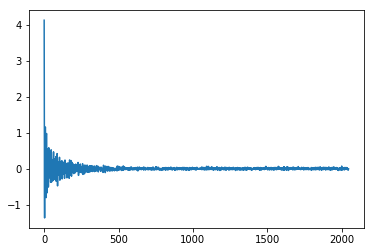

In [5]:
%matplotlib inline
noise = 0.02 * (np.random.randn(N) + 1j * np.random.randn(N))

data = data_raw + noise

data[:4] += 1 * (np.random.randn(4) + 1j * np.random.randn(4))

pl.plot(data)
pl.show()

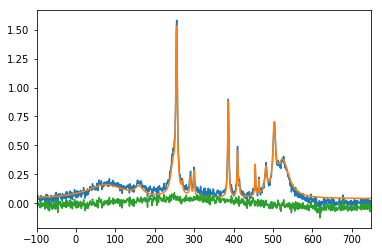

In [6]:
data_fft = np.fft.fftshift(np.fft.fft(data)) / np.sqrt(N)
data_fft_raw = np.fft.fftshift(np.fft.fft(data_raw)) / np.sqrt(N)

pl.plot(freq_array, data_fft.real)
pl.plot(freq_array, data_fft_raw.real)
pl.plot(freq_array, data_fft.real - data_fft_raw.real )

pl.xlim(-100, 750)
pl.show()

In [7]:
m_range = range(200, 500, 8)
result = llc_kbdm(
    data=data, 
    dwell=dwell, 
    m_range=m_range, 
    p=1, 
    gep_solver='svd', 
    l=30, 
    q=0, 
)

In [8]:
llc_params_est = result.line_list
result.silhouette

[0.7762099414982093,
 0.8093741379406278,
 0.9649986295721736,
 0.6859885429866455,
 0.9692288101307442,
 0.8244598477086088,
 0.9241610605784815,
 0.823420558371534,
 0.8603661745572647,
 0.8164083122540816,
 0.7047671003411402,
 0.8239529762589786,
 0.7973811288990867,
 0.724068931791978,
 0.8129840791937439,
 0.7702029559063751,
 0.8982514753433444,
 0.9796611893454162,
 0.8672919528261626,
 0.8363190596904654,
 0.8672792866183928,
 0.9373736965379735,
 0.5308970612586478,
 0.8379576593087557,
 0.8362897620980537,
 0.5486042636143688,
 0.8532146920089105,
 0.7894895526570519,
 0.8432932782940407]

In [15]:
df_est = pd.DataFrame(data=llc_params_est, columns=columns)
df_est['silhouete'] = result.silhouette
df_est['gamma'] = 1/df_est['t2']
df_est['phase_deg'] = df_est['phase'] * 180 / np.pi
df_est.sort_values(by='frequency')
df_est = df_est[df_est['silhouete'] > 0]
df_est

,amplitude,t2,frequency,phase,silhouete,gamma,phase_deg
0,1.304756,0.000978,705.647327,0.753826,0.776210,1022.424854,43.191034
1,0.878299,0.006605,532.641395,-0.412100,0.809374,151.399397,-23.611567
2,0.010986,0.048457,-295.123342,-1.727915,0.964999,20.636721,-99.002238
3,0.828576,0.002991,60.817840,0.486332,0.685989,334.338556,27.864759
4,0.008119,0.079418,-540.987671,2.021433,0.969229,12.591654,115.819552
5,0.007419,0.047106,-431.861111,-0.073861,0.824460,21.228628,-4.231933
6,0.005980,0.037857,-661.097413,0.385102,0.924161,26.415416,22.064744
7,0.015758,0.016091,758.037319,0.269590,0.823421,62.146947,15.446367
8,0.005984,0.040272,876.130836,-0.550617,0.860366,24.831266,-31.548044
9,0.008995,0.023177,-935.357761,-0.136171,0.816408,43.146906,-7.802034


<IPython.core.display.Javascript object>


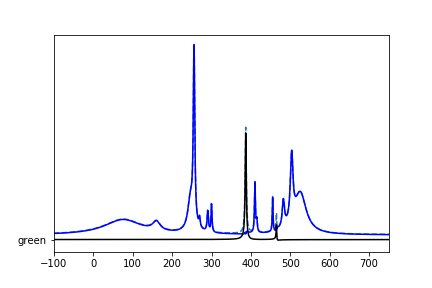

0.03735450703941597


In [13]:
%matplotlib notebook
%matplotlib notebook

params_est = df_est.as_matrix()[:,0:4]

data_est = multi_fid(t_array, params_est[1::])
data_fft_est = np.fft.fftshift(np.fft.fft(data_est)) / np.sqrt(N)

# noise
#pl.plot(freq_array, data_fft.real - data_fft_est.real, 'green')

# raw
pl.plot(freq_array, data_fft_raw.real, '--', 'green')

# raw diff
pl.plot(freq_array, data_fft_raw.real - data_fft_est.real, 'blue')

# rdata
#pl.plot(freq_array, data_fft.real, 'red', alpha=0.1)

# estimatated
pl.plot(freq_array, data_fft_est.real, 'black')

pl.xlim(-100, 750)

pl.show()
print(result.rmse)

In [ ]:
min_rmse_kbdm = min_rmse_kbdm(data, dwell, m_range, l=30)

In [ ]:
df_est = pd.DataFrame(data=min_rmse_kbdm.line_list, columns=columns)
df_est['gamma'] = 1/df_est['t2']
df_est['phase_deg'] = df_est['phase'] * 180 / np.pi
df_est.sort_values(by='frequency')

In [ ]:
# %matplotlib notebook
# %matplotlib notebook

data_min_rmse = multi_fid(t_array, min_rmse_kbdm.line_list)

data_min_rmse_fft = np.fft.fftshift(np.fft.fft(data_min_rmse)) / np.sqrt(N)
data_fft_raw = np.fft.fftshift(np.fft.fft(data_raw)) / np.sqrt(N)


#pl.plot(freq_array, data_min_rmse_fft.real - data_fft.real)
pl.plot(freq_array, data_fft_raw.real, '--', 'green')
pl.plot(freq_array, data_fft_raw.real - data_min_rmse_fft.real, 'orange')
pl.plot(freq_array, data_min_rmse_fft.real, 'red')

pl.xlim(-100, 750)
pl.show()
print(min_rmse_kbdm.min_rmse)